<h3> SciPython/Practical_classes_4

<h4> Exercise1: One built a model for predicting the category of a binary variable $Y$ based on features $X_1$ and $X_2$.
    
$p = \frac{1}{1+e^{-2X_1+4X_2+1}}$
   
To which category do the following observations belong according to the model?

Observations:

1. $X_1=3$, $X_2=1$
2. $X_1=2$, $X_2=1$
3. $X_1=2$, $X_2=2$
    
    
If the true labels are: 1, 0, and 0, what is the value of the Binary Cross-Entropy (BCE)?

* How to build a logistic regression model in Python?

In [55]:
from sklearn import linear_model

model = linear_model.LogisticRegression()

X = np.array([[1,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y  = np.array([0, 0, 0, 1, 1, 1])

model.fit(X,y);

In [20]:
model.coef_, model.intercept_ #model parameters

(array([[-0.39682866, -0.82497163]]), array([0.11932619]))

In [21]:
model.predict([[3,3]]), model.predict_proba([[3,3]]) #class prediction and corresponding probabilities

(array([0]), array([[0.97197068, 0.02802932]]))

In [22]:
model.score(X, y) #calculate the accuracy

1.0

<h4> Exercise2: Consider Breast Cancer Dataset

In [50]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [15]:
print("""
This dataset contains information about breast cancer tumors.
The dataset includes 30 numerical features, such as:

radius

texture

perimeter

area

smoothness
... and more.

Target variable:
0 → Benign (non-cancerous)

1 → Malignant (cancerous)
""")


This dataset contains information about breast cancer tumors.
The dataset includes 30 numerical features, such as:

radius

texture

perimeter

area

smoothness
... and more.

Target variable:
0 → Benign (non-cancerous)

1 → Malignant (cancerous)



In [38]:
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<h4> The goal is to predict whether a tumor is malignant or benign based on various medical features using a logistic regression model.

- What is the number of samples?

- Split the dataset into training and test sets (8:2).

- Train the model on the training data.
    
- Which features have a positive/negative impact on malignancy?

- Calculate accuracy on both the training and test sets.

* More than two classes

In this case, we compute the probability for each category $P(Y=i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$ where $i=1,2,...,M$.

In [29]:
from sklearn import linear_model

model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

X = np.array([[1,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y  = np.array([0, 0, 0, 1, 1, 2])

model.fit(X,y);

print(model.coef_, model.intercept_)
print()
print(model.predict_proba([[-3,-1]]))

[[ 0.31230406  0.53275627]
 [ 0.27963836 -0.51973687]
 [-0.59194242 -0.01301941]] [ 0.65089809 -0.51626244 -0.13463566]

[[0.07224799 0.07105358 0.85669842]]


<h4> Exercise3: Justify the above probabilities based on the model parameters through direct calculations.

* Regularization

In [52]:
from sklearn import linear_model

model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.1) #C = 1/beta  (regularization L2)

X = np.array([[1,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y  = np.array([0, 0, 0, 1, 1, 2])

model.fit(X,y);

print(model.coef_, model.intercept_)
print()
print(model.predict_proba([[-3,-1]]))

[[ 0.12039019  0.26800224]
 [ 0.10715927 -0.25049358]
 [-0.22754947 -0.01750865]] [ 0.48078676 -0.27241502 -0.20837174]

[[0.26884397 0.22121121 0.50994482]]


<h4> Exercise4: Consider Wine Dataset

In [47]:
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
y = data.target

In [44]:
print("""
It contains data on 178 wine samples, each with 13 chemical features,
such as alcohol content, malic acid, ash content, and color intensity,
among others.
""")


It contains data on 178 wine samples, each with 13 chemical features,
such as alcohol content, malic acid, ash content, and color intensity,
among others.



In [41]:
print(data['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<h4> The goal is to classify wines into one of three classes (types) based on their features.

- Split the dataset into training, test, and validation sets (with a ratio of 6:2:2).

- Train the model using the training data. Experiment with different values for the regularization parameter $C$ (e.g., 0.001, 0.01, 0.1, 1, 10, 100). Calculate the accuracy on the validation set.

- Finally, calculate the accuracy on the test set using the chosen/optimal $C$ parameter

* How to calculate the area under the curve?

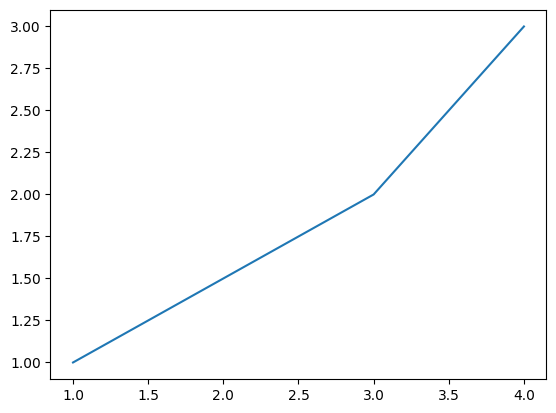

area = 5.5


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

x = np.array([1,3,4])
y = np.array([1,2,3])

plt.plot(x,y)
plt.show()

area = trapz(y, x)
print("area =", area)

<h4> Exercise5: Open the "logistic_regression" file, which contains information about the actual classes and predictions according to the logistic regression model for subsequent observations.

- Calculate the values of $S_n$ (sensitivity) and $S_p$ (specificity) for 20 equally spaced $p_c$ values ranging from 0 to 1.

- Plot the ROC curve and mark the point corresponding to $p_c = 0.5$.

- Calculate the Area Under the Curve (AUC).